In [46]:
import numpy as np
from matplotlib import pyplot as plt
from numpy import linalg as la
import tensorflow as tf

## Defining Functions

We fit a nonlinear model $y = f(x;\beta) + \epsilon$ to a given dataset below, where $f(x;\beta) = \beta_0\cdot\exp(x/\beta_1)$.

In [47]:
def model(x, truth_beta):
    return truth_beta[0]*np.exp(x/truth_beta[1])


def Fval(x, y, beta):
    return model(x, beta) - y


def Jac(x, beta):
    return np.array([np.exp(x/beta[1]), -(beta[0]/beta[1]**2)*np.exp(x/beta[1])*x])

## Generate datasets

In [48]:
beta_truth = [0.15, 3.75]
x_train = np.linspace(0, 10, num=50)
y_train = model(x_train, beta_truth) + np.random.normal(0, 0.2, size=len(x_train))

## Default Gauss-Newton Method

Iteration:  0 -- Error: 2.9070e+05
Iteration:  1 -- Error: 5.2788e+03
Iteration:  2 -- Error: 9.9461e+02
Iteration:  3 -- Error: 1.6185e+02
Iteration:  4 -- Error: 2.5022e+01
Iteration:  5 -- Error: 2.3745e+00
Iteration:  6 -- Error: 3.5610e-02
Iteration:  7 -- Error: 2.3824e-05
>>> Convergence achieved!

Parameters: [0.14822399 3.61968292] 
Error:  2.38239503121586e-05 
Number of Iterations:  7


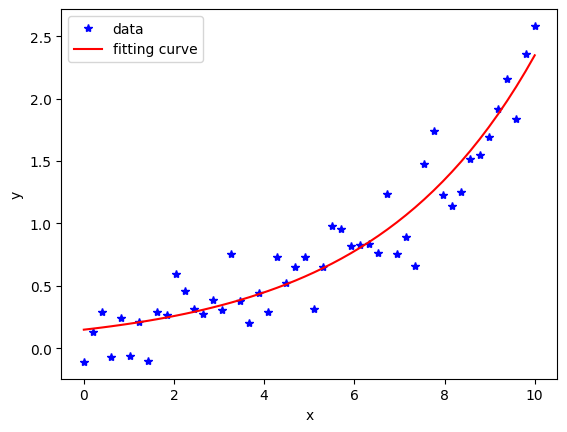

In [49]:
# Default Gauss-Newton Method
def GN(Fx, Jac, x, y, beta0, maxiter = 100, tol = 1e-3):
    bet = beta0
    err  = 0
    for t in range(maxiter):
        Ft  = Fx(x, y, bet)
        Jt  = Jac(x, bet)
        St  = la.pinv(Jt.dot(Jt.T))
        yt  = Jt.dot(Ft).T
        dt  = np.ravel(St.dot(yt))
        bet = bet - dt
        err = la.norm(yt)
        print("Iteration: {0:2d}".format(t), "-- Error: {0:5.4e}".format(err))
        if err <= tol:
            print(">>> Convergence achieved!")
            break
    return bet, err, t

# We run it.
beta0 = [1, 2]
beta_best, err, n_it = GN(Fval, Jac, x_train, y_train, beta0, maxiter=1000)
print("\nParameters:", beta_best, "\nError: ", err, "\nNumber of Iterations: ", n_it)

# Plotting
plt.plot(x_train, y_train, 'b*', label='data')
plt.plot(x_train, model(x_train, beta_best), "-r", label="fitting curve")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## AutoDiff Gauss-Newton Method

Iteration:  0 -- Error: 2.9070e+05
Iteration:  1 -- Error: 5.2788e+03
Iteration:  2 -- Error: 9.9461e+02
Iteration:  3 -- Error: 1.6185e+02
Iteration:  4 -- Error: 2.5022e+01
Iteration:  5 -- Error: 2.3745e+00
Iteration:  6 -- Error: 3.5610e-02
Iteration:  7 -- Error: 2.3824e-05
>>> Convergence achieved!

Parameters: [0.14822399 3.61968292] 
Error:  2.382395031163447e-05 
Number of Iterations:  7


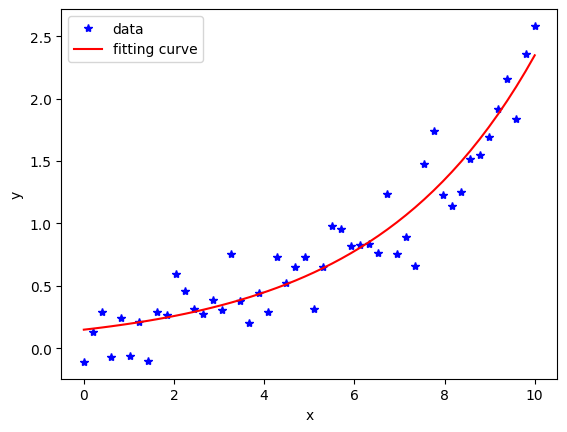

In [50]:
def tf_model(x, truth_beta):
    return tf.multiply(truth_beta[0], tf.exp(tf.divide(x, truth_beta[1])))

# Default Gauss-Newton Method
def GN_Auto_Diff(Fx, tf_Fx, x, y, beta0, maxiter=100, tol=1e-3):
    bet = beta0
    err = 0
    for t in range(maxiter):
        Ft = Fx(x, y, bet)

        # Compute value of Jacobian matrix using Auto Diff
        tf_x = tf.constant(x, dtype=tf.float64)
        tf_bet = tf.Variable(bet, dtype=tf.float64)
        with tf.GradientTape() as tape:
            J = tf_Fx(tf_x, tf_bet)
        Jt = tape.jacobian(J, tf_bet).numpy().T
        
        St = la.pinv(Jt.dot(Jt.T))
        yt = Jt.dot(Ft).T
        dt = np.ravel(St.dot(yt))
        bet = bet - dt
        err = la.norm(yt)
        print("Iteration: {0:2d}".format(t), "-- Error: {0:5.4e}".format(err))
        if err <= tol:
            print(">>> Convergence achieved!")
            break
    return bet, err, t


# Running
beta0 = [1, 2]
beta_best, err, n_it = GN_Auto_Diff(Fval, tf_model, x_train, y_train, beta0, maxiter=1000)
print("\nParameters:", beta_best, "\nError: ", err, "\nNumber of Iterations: ", n_it)

# Plotting
plt.plot(x_train, y_train, 'b*', label='data')
plt.plot(x_train, model(x_train, beta_best), "-r", label="fitting curve")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## Damped Gauss-Newton Method

Iteration:  0 -- Error: 2.9070e+05
Iteration:  1 -- Error: 2.3990e+05
Iteration:  2 -- Error: 1.9858e+05
Iteration:  3 -- Error: 1.6494e+05
Iteration:  4 -- Error: 1.3750e+05
Iteration:  5 -- Error: 1.1507e+05
Iteration:  6 -- Error: 9.6701e+04
Iteration:  7 -- Error: 8.1602e+04
Iteration:  8 -- Error: 6.9150e+04
Iteration:  9 -- Error: 5.8839e+04
Iteration: 10 -- Error: 5.0262e+04
Iteration: 11 -- Error: 4.3091e+04
Iteration: 12 -- Error: 3.7066e+04
Iteration: 13 -- Error: 3.1975e+04
Iteration: 14 -- Error: 2.7651e+04
Iteration: 15 -- Error: 2.3960e+04
Iteration: 16 -- Error: 2.0794e+04
Iteration: 17 -- Error: 1.8066e+04
Iteration: 18 -- Error: 1.5707e+04
Iteration: 19 -- Error: 1.3659e+04
Iteration: 20 -- Error: 1.1878e+04
Iteration: 21 -- Error: 1.0326e+04
Iteration: 22 -- Error: 8.9705e+03
Iteration: 23 -- Error: 7.7864e+03
Iteration: 24 -- Error: 6.7515e+03
Iteration: 25 -- Error: 5.8473e+03
Iteration: 26 -- Error: 5.0576e+03
Iteration: 27 -- Error: 4.3687e+03
Iteration: 28 -- Err

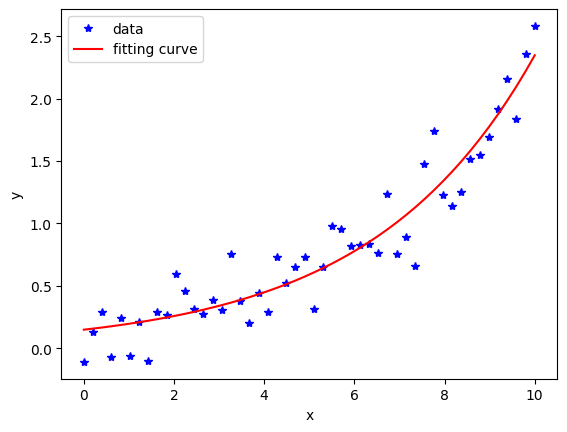

In [51]:
# Damped Gauss-Newton Method
def GN_damped(Fx, Jac, x, y, beta0, stepsize=1, maxiter=100, tol=1e-3):
    bet = beta0
    err = 0
    for t in range(maxiter):
        Ft = Fx(x, y, bet)
        Jt = Jac(x, bet)
        St = la.pinv(Jt.dot(Jt.T))
        yt = Jt.dot(Ft).T
        dt = np.ravel(St.dot(yt))
        err = la.norm(yt)

        # Add step size
        bet = bet - stepsize * dt
        
        print("Iteration: {0:2d}".format(t), "-- Error: {0:5.4e}".format(err))
        if err <= tol:
            print(">>> Convergence achieved!")
            break
    return bet, err, t


# We run it.
beta0 = [1, 2]
step = 0.1
beta_best, err, n_it = GN_damped(
    Fval, Jac, x_train, y_train, beta0=beta0, stepsize=step, maxiter=1000)
print("\nParameters:", beta_best, "\nError: ",
      err, "\nNumber of Iterations: ", n_it)

# Plotting
plt.plot(x_train, y_train, 'b*', label='data')
plt.plot(x_train, model(x_train, beta_best), "-r", label="fitting curve")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## Line Search

### Naive Approach

- A bit more flexible than the default implementation in terms of choosing initial point
- However, when the initial point is too far away from the truth point, this approach still fails

Iteration:  0 -- Error: 7.5627e+02
Iteration:  1 -- Error: 9.3942e+01
Performing Line Search at iteration 2
Current step size: 1
Performing Line Search at iteration 2
Current step size: 0.5
Performing Line Search at iteration 2
Current step size: 0.25
Performing Line Search at iteration 2
Current step size: 0.125
Performing Line Search at iteration 2
Current step size: 0.0625
Performing Line Search at iteration 2
Current step size: 0.03125
Performing Line Search at iteration 2
Current step size: 0.015625
Performing Line Search at iteration 2
Current step size: 0.0078125
Iteration:  2 -- Error: 3.7065e+01
Performing Line Search at iteration 3
Current step size: 1
Performing Line Search at iteration 3
Current step size: 0.5
Performing Line Search at iteration 3
Current step size: 0.25
Performing Line Search at iteration 3
Current step size: 0.125
Performing Line Search at iteration 3
Current step size: 0.0625
Performing Line Search at iteration 3
Current step size: 0.03125
Performing Lin

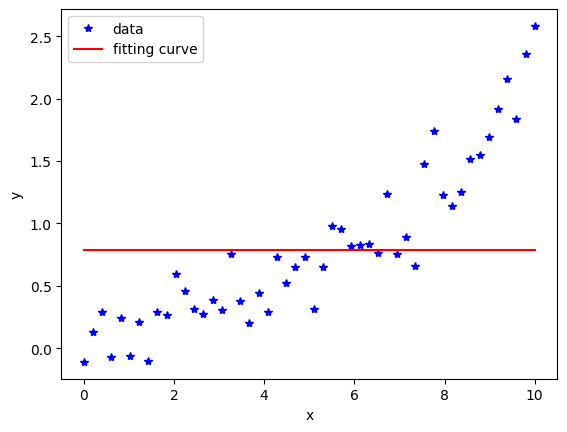

In [52]:
# Damped Gauss-Newton Method
def GN_naive_linesearch(Fx, Jac, x, y, beta0, stepsize=1, maxiter=100, tol=1e-3):
    beta = beta0
    err = 0
    for t in range(maxiter):
        Ft = Fx(x, y, beta)
        Jt = Jac(x, beta)
        St = la.pinv(Jt.dot(Jt.T))
        yt = Jt.dot(Ft).T
        dt = np.ravel(St.dot(yt)) # descent direction
        err = la.norm(yt)

        # Naive Line Search
        current_stepsize = stepsize
        while True:
            next_beta = beta - current_stepsize * dt
            next_Ft = Fx(x, y, next_beta)
            if la.norm(next_Ft) <= la.norm(Ft):
                break
            print(f"Performing Line Search at iteration {t}")
            print(f"Current step size: {current_stepsize}")
            current_stepsize /= 2

        beta = next_beta
        print("Iteration: {0:2d}".format(t), "-- Error: {0:5.4e}".format(err))
        if err <= tol:
            print(">>> Convergence achieved!")
            break
    return beta, err, t


# We run it.
beta0 = [5, 10]
beta_best, err, n_it = GN_naive_linesearch(
    Fval, Jac, x_train, y_train, beta0=beta0, maxiter=1000)
print("\nParameters:", beta_best, "\nError: ",
      err, "\nNumber of Iterations: ", n_it)

# Plotting
plt.plot(x_train, y_train, 'b*', label='data')
plt.plot(x_train, model(x_train, beta_best), "-r", label="fitting curve")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

### Armijo Condition

Iteration:  0 -- Error: 7.1578e+02
Iteration:  1 -- Error: 7.3146e+01
Performing Line Search at iteration 2
Current step size: 1
Performing Line Search at iteration 2
Current step size: 0.5
Performing Line Search at iteration 2
Current step size: 0.25
Performing Line Search at iteration 2
Current step size: 0.125
Performing Line Search at iteration 2
Current step size: 0.0625
Performing Line Search at iteration 2
Current step size: 0.03125
Performing Line Search at iteration 2
Current step size: 0.015625
Iteration:  2 -- Error: 4.3950e+01
Iteration:  3 -- Error: 4.3096e+01
Performing Line Search at iteration 4
Current step size: 1
Performing Line Search at iteration 4
Current step size: 0.5
Performing Line Search at iteration 4
Current step size: 0.25
Performing Line Search at iteration 4
Current step size: 0.125
Performing Line Search at iteration 4
Current step size: 0.0625
Performing Line Search at iteration 4
Current step size: 0.03125
Performing Line Search at iteration 4
Current 

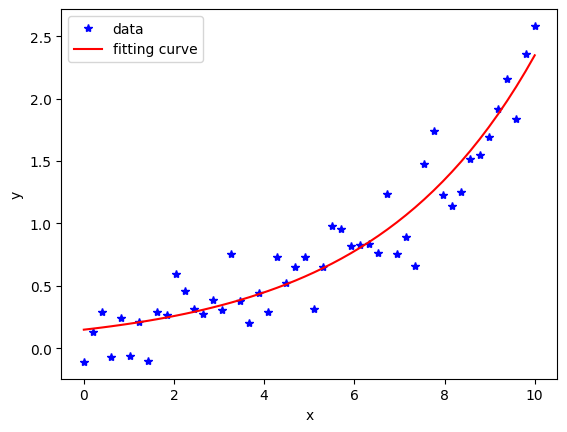

In [59]:
def GN_Armijo(Fx, Jac, x, y, beta0, stepsize=1, maxiter=100, tol=1e-6, c=1e-4, backtrack_param=0.5):
    """Gauss-Newton method with Armijo Linesearch

    Args:
        Fx: Objective function
        Jac: Jacobian of Fx
        x: x data
        y: y data
        beta0: initial beta parameter point
        eta0: stepsize. Defaults to 1.
        maxiter: maximum number of iterations. Defaults to 100.
        tol: error tolerance. Defaults to 1e-3.
        c: scaling factor. Typically very small. Defaults to 1e-4
        backtrack_param: backtrack factor (0<backtrack_param<=1). Defaults to 0.5.

    Returns:
        beta: the approximation of parameters
        err: the error
        t: the last iteration
    """
    beta = beta0
    err = 0
    for t in range(maxiter):
        Ft = Fx(x, y, beta)
        Jt = Jac(x, beta)
        St = la.pinv(Jt.dot(Jt.T))
        yt = Jt.dot(Ft).T
        dt = np.ravel(St.dot(yt))
        err = la.norm(yt)

        # Perform Armijo Line-search to find the best next beta
        current_stepsize = stepsize
        scale_inner_prod = c * la.norm(Jt.T.dot(-dt)) ** 2
        while True:
            next_beta = beta - current_stepsize * dt
            next_Ft = Fx(x, y, next_beta)
            # Armijo Rule
            if la.norm(Ft) - la.norm(next_Ft) >= current_stepsize * scale_inner_prod:
                break
            print(f"Performing Line Search at iteration {t}")
            print(f"Current step size: {current_stepsize}")
            current_stepsize *= backtrack_param
        
        beta = next_beta
        print("Iteration: {0:2d}".format(t), "-- Error: {0:5.4e}".format(err))
        if err <= tol:
            print(">>> Convergence achieved!")
            break
    return beta, err, t


# We run it.
beta0 = [10, 25]
beta_best, err, n_it = GN_Armijo(
    Fval, Jac, x_train, y_train, beta0,
    backtrack_param=0.5
)
print("\nParameters:", beta_best, "\nError: ",
      err, "\nNumber of Iterations: ", n_it)

# Plotting
plt.plot(x_train, y_train, 'b*', label='data')
plt.plot(x_train, model(x_train, beta_best), "-r", label="fitting curve")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

### Wolfe Condition